In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df_feddata = pd.read_csv("Files/FEDFUNDS.csv")
df_n225 = pd.read_csv("Files/N225.csv")
df_imoex = pd.read_csv("Files/IMOEX.csv")
df_Sensex = pd.read_csv("Files/Sensex_data.csv")
df_hangsen = pd.read_csv("Files/Hangsen.csv")
df_hangsen

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-01,22070.439453,22718.830078,21687.880859,22656.919922,22656.919922,29324098700
1,2013-01-01,22860.250000,23916.160156,22860.250000,23729.529297,23729.529297,36737630400
2,2013-02-01,23763.339844,23944.740234,22445.339844,23020.269531,23020.269531,29040943000
3,2013-03-01,22957.089844,23262.019531,21975.900391,22299.630859,22299.630859,36448798500
4,2013-04-01,22203.929688,22862.689453,21423.250000,22737.009766,22737.009766,31954683500
...,...,...,...,...,...,...,...
115,2022-07-01,21690.679688,22198.509766,20050.050781,20156.509766,20156.509766,37726894300
116,2022-08-01,20026.599609,20283.589844,19189.539063,19954.390625,19954.390625,40155849000
117,2022-09-01,19761.720703,19839.509766,17016.279297,17222.830078,17222.830078,42070114000
118,2022-10-01,17050.250000,18164.199219,14597.309570,14687.019531,14687.019531,45816860400


In [17]:
Sensex_merge = df_Sensex.merge(df_feddata,left_on ="Date", right_on = "Date", how="inner")
imoex_merge = df_imoex.merge(df_feddata,left_on ="Date", right_on = "Date", how="inner").dropna()
n225_merge= df_n225.merge(df_feddata,left_on ="Date", right_on = "Date", how="inner")


,Date,Open,High,Low,Close,Adj Close,Volume,Fed_funds


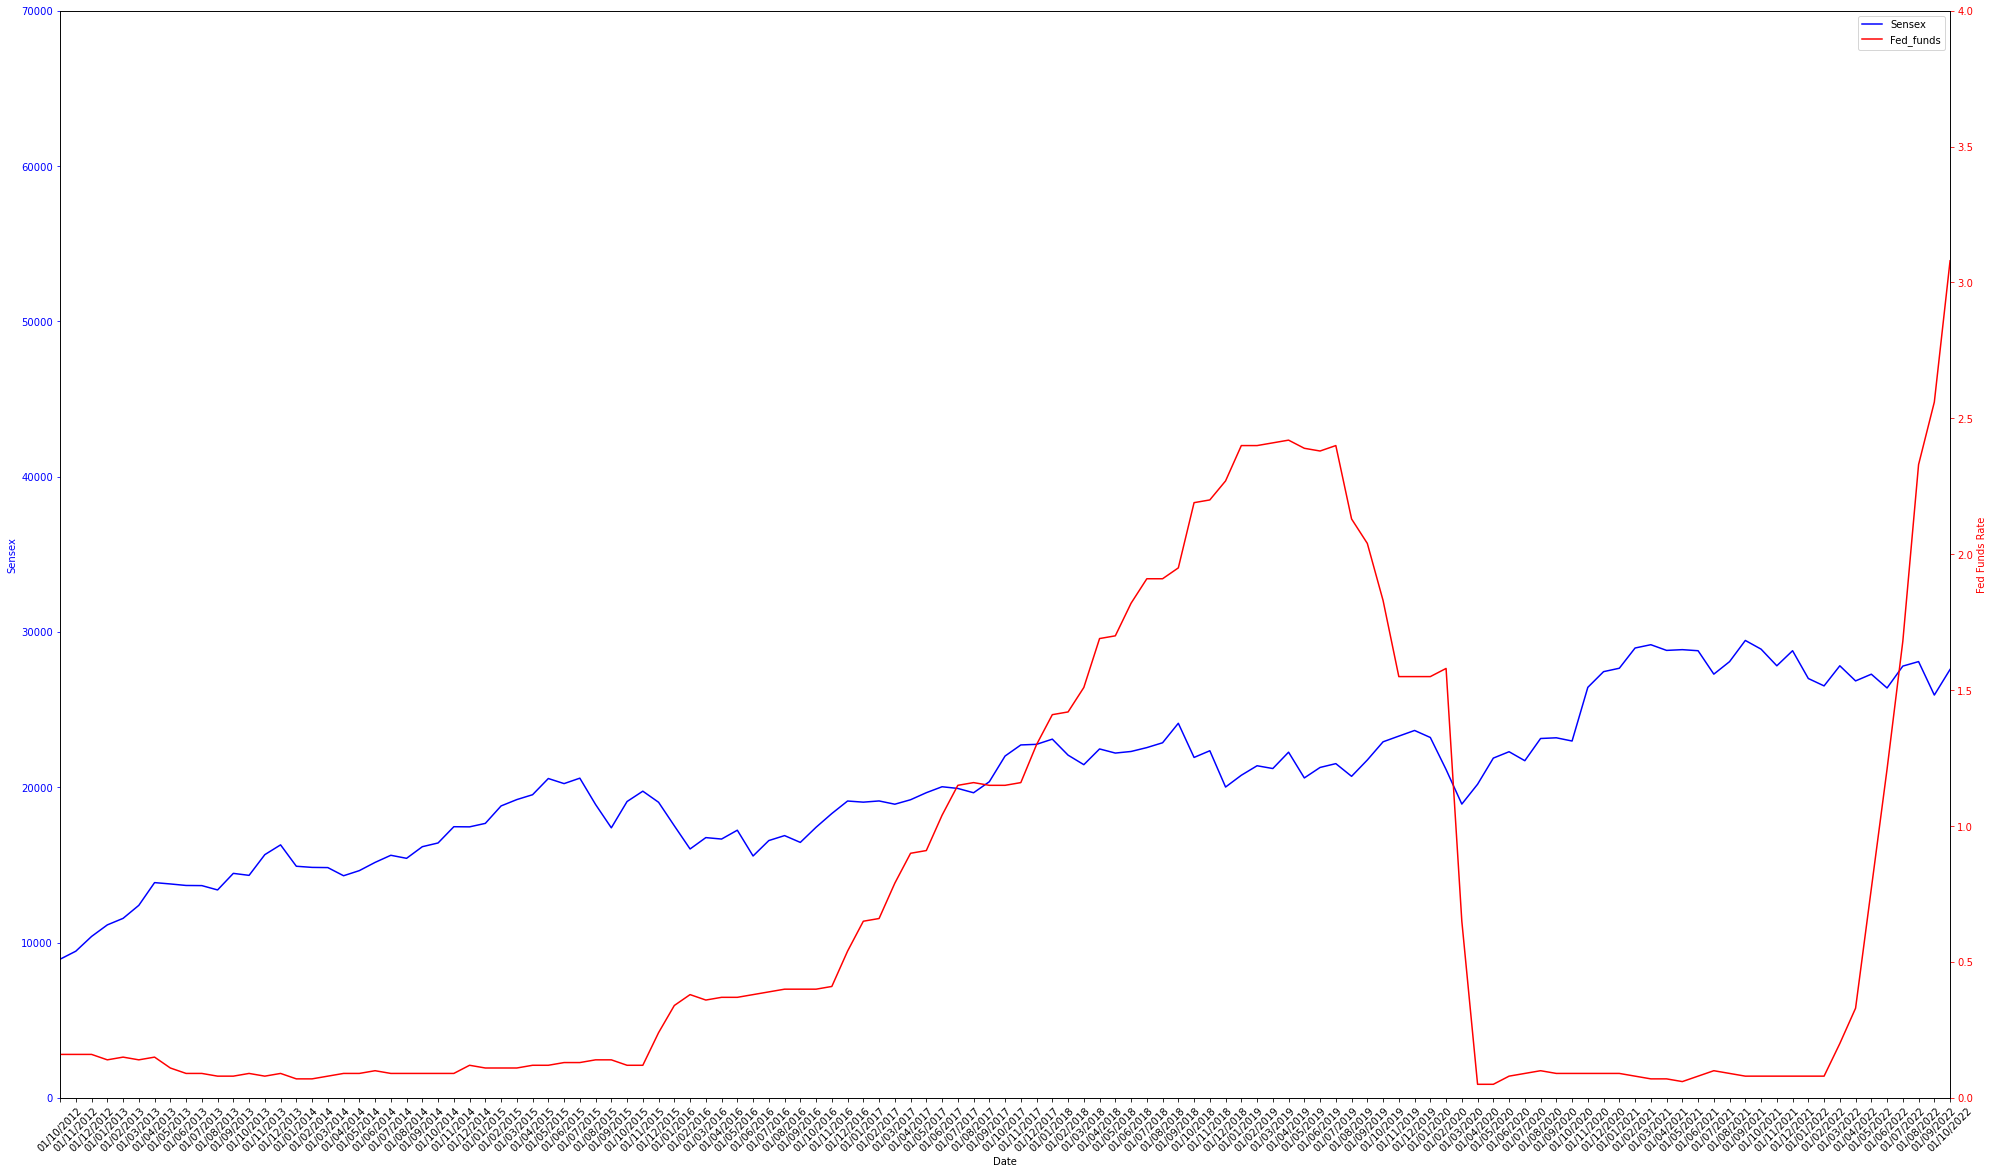

In [18]:
n225_merge2 = n225_merge[["Date","Close","Fed_funds"]]
x = n225_merge2.set_index("Date")

fig, ax = plt.subplots()
fig.subplots_adjust(right=1)
fig.set_figheight(20)
fig.set_figwidth(30)

twin1 = ax.twinx()



p1, = ax.plot(x["Close"], "b-", label="Sensex")
p2, = twin1.plot(x["Fed_funds"],"r-", label="Fed_funds")

ax.set_xlim(0, 120)
ax.set_ylim(0, 70000)
twin1.set_ylim(0, 4)


ax.set_xlabel("Date")
ax.set_ylabel("Sensex")
twin1.set_ylabel("Fed Funds Rate")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())


ax.tick_params(axis='y', colors=p1.get_color())
twin1.tick_params(axis='y', colors=p2.get_color())

ax.tick_params(axis='x',rotation=45)

ax.legend(handles=[p1, p2])


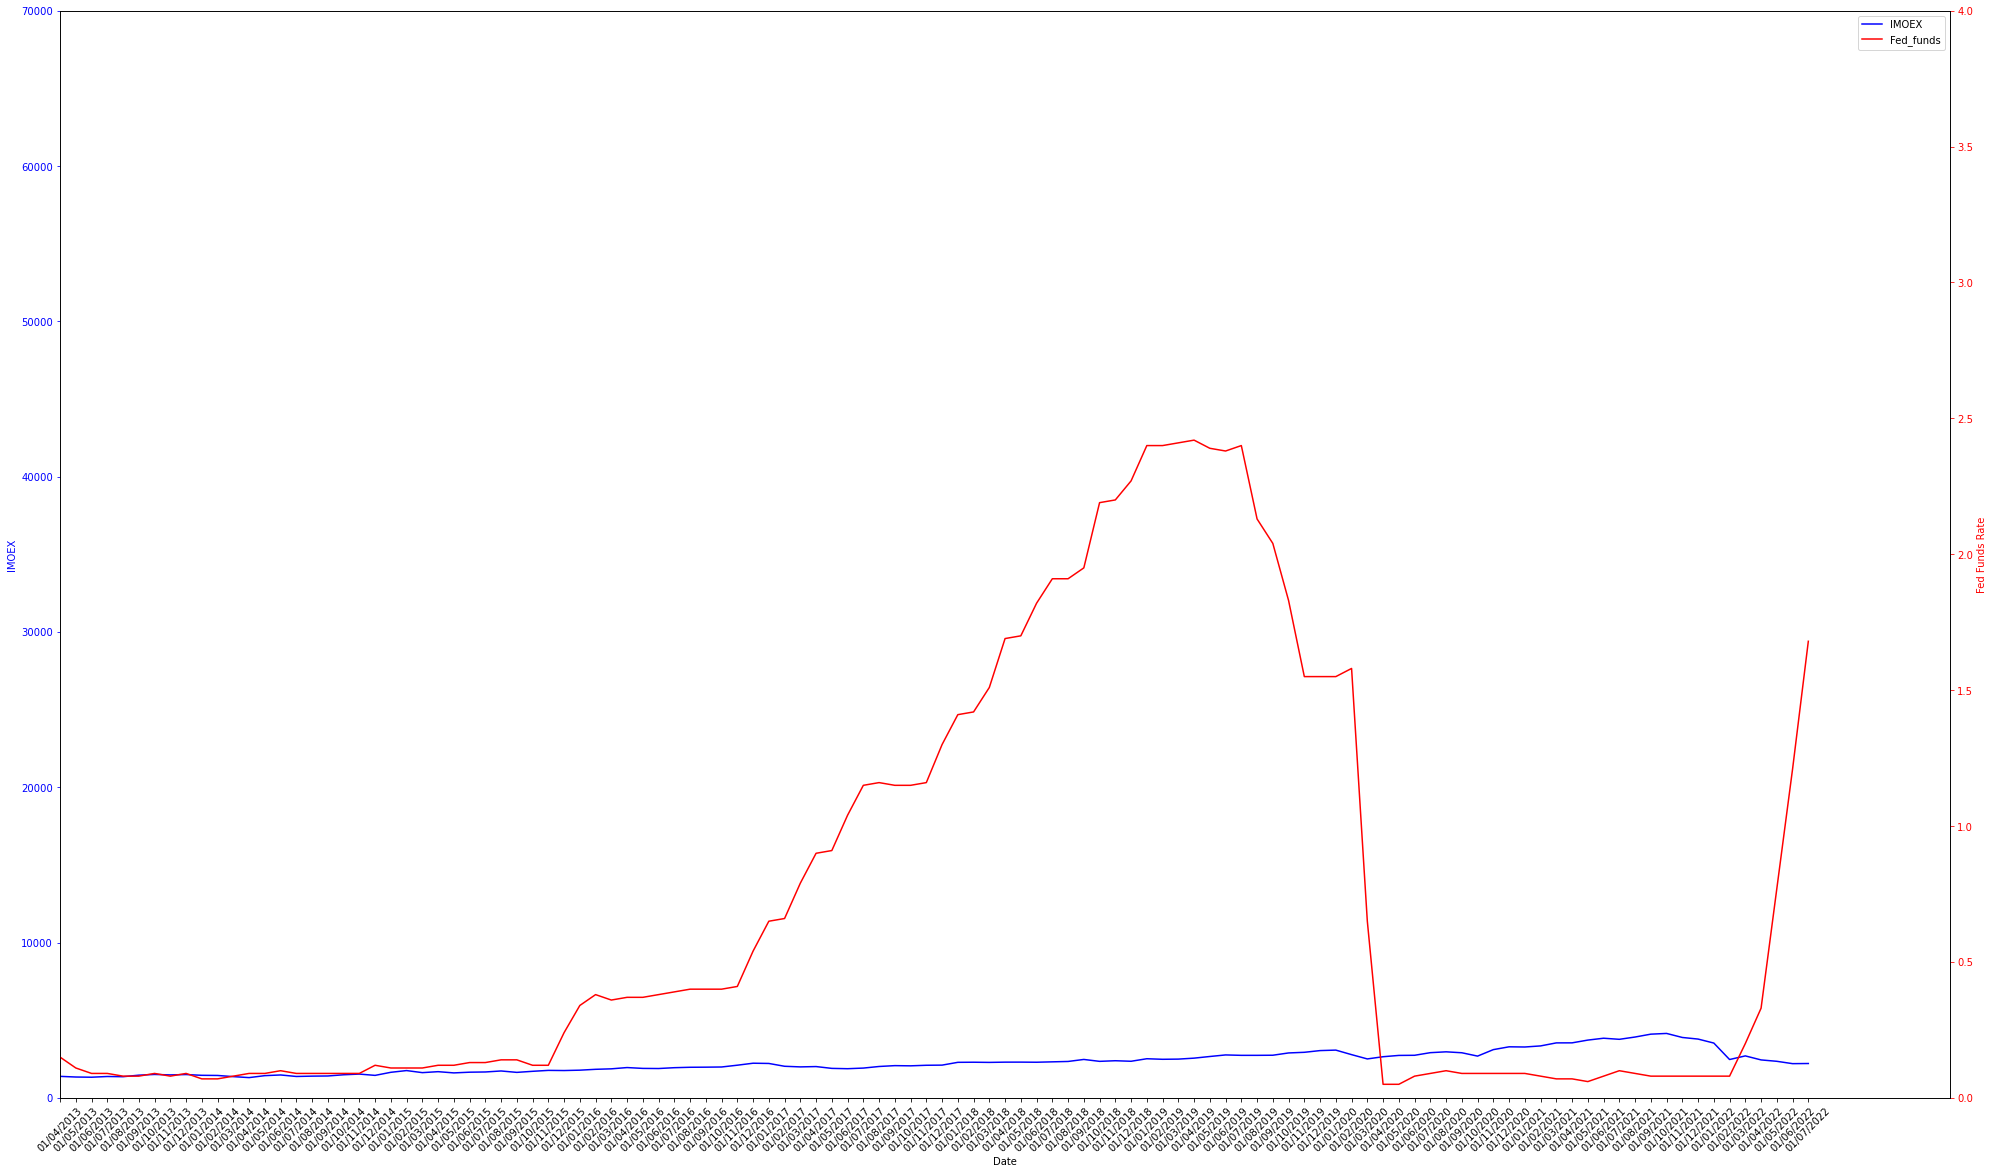

In [6]:
imoex_merge2 = imoex_merge[["Date","Close","Fed_funds"]]
y = imoex_merge2.set_index("Date")

fig, ax = plt.subplots()
fig.subplots_adjust(right=1)
fig.set_figheight(20)
fig.set_figwidth(30)

twin1 = ax.twinx()



p1, = ax.plot(y["Close"], "b-", label="IMOEX")
p2, = twin1.plot(y["Fed_funds"],"r-", label="Fed_funds")

ax.set_xlim(0, 120)
ax.set_ylim(0, 70000)
twin1.set_ylim(0, 4)


ax.set_xlabel("Date")
ax.set_ylabel("IMOEX")
twin1.set_ylabel("Fed Funds Rate")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())


ax.tick_params(axis='y', colors=p1.get_color())
twin1.tick_params(axis='y', colors=p2.get_color())

ax.tick_params(axis='x',rotation=45)

ax.legend(handles=[p1, p2])
